### Import Library

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Read and plot data

In [135]:
df = pd.read_csv('data/iris.csv', header=None, encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
df[4].value_counts()

4
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

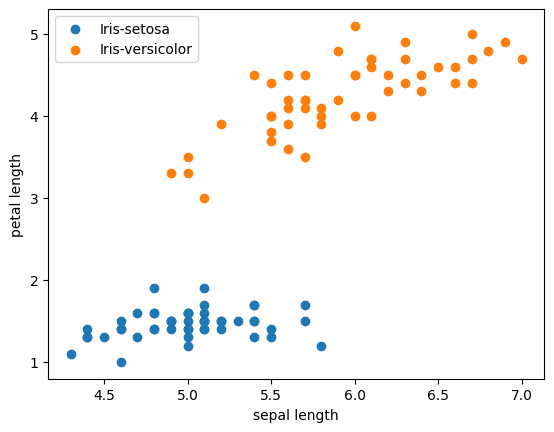

In [175]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], label='Iris-setosa')
plt.scatter(X[50:, 0], X[50:, 1], label='Iris-versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()
plt.show()

### Perceptron Learning Algorithm (1957 by Rosenblatt)
- It's a basic supervised learning algorithm used for binary classification tasks. 
- Perceptron learning algorithm learns a linear binary classifier that separates two classes by finding the optimal decision boundary in the feature space
How it works:
1. Initialize random weight $w$ and bias $b$
2. Feed the input data into the perceptron and compute the weighted sum of inputs with bias where $x_i$ is the feature of input data:
$$
z=\sum_{i=1}^n w_i x_i+b
$$

3. Apply the step function to get the predicted label:
$$
\hat{y}= \begin{cases}1 & \text { if } z \geq 0 \\ 0 & \text { otherwise }\end{cases}
$$
4. Update the weight and bias with $\alpha$ is the learning rate:
$$
\begin{aligned}
& w_i \leftarrow w_i+\alpha(y-\hat{y}) x_i \\
& b \leftarrow b+\alpha(y-\hat{y})
\end{aligned}
$$
5. Iterate through the dataset multiple times (epochs)

**Note**: the convergence is guaranteed if data (2 classes) are linearly separable. If the classes can not be separated linearly, the weights will never stop updating until reaching the maximum epochs

In [55]:
random_state = 1
alpha = 0.01
epochs = 15

In [176]:
w = np.random.RandomState(random_state).normal(loc=0, scale=0.01, size=X.shape[1])
b = np.float64(0)
errors = []

for _ in range(epochs):
    error = 0
    for xi, yi in zip(X, y):
        z = np.dot(xi, w) + b
        y_hat = 1 if z >= 0.0 else 0
        w += alpha * (yi - y_hat) * xi
        b += alpha * (yi - y_hat)
        error += int(alpha * (yi - y_hat) != 0.0)
    errors.append(error)

Text(0, 0.5, 'Number of updates')

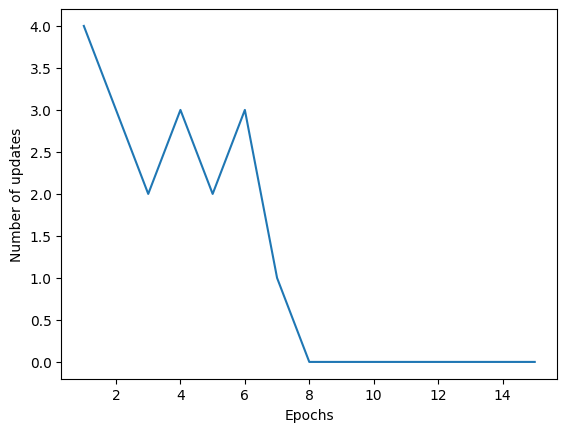

In [177]:
plt.plot(range(1, epochs + 1), errors)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

### Plot the decision regions

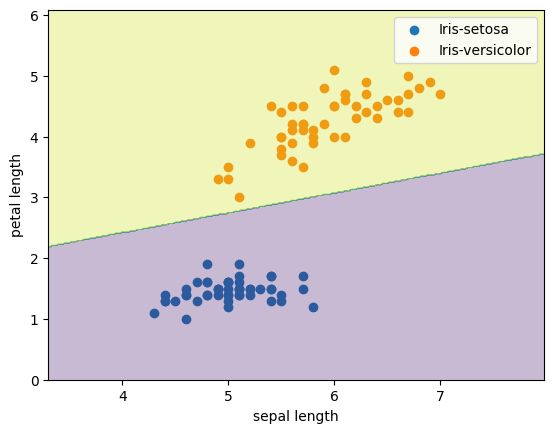

In [178]:
plt.scatter(X[:50, 0], X[:50, 1], label='Iris-setosa')
plt.scatter(X[50:, 0], X[50:, 1], label='Iris-versicolor')
# find the minimun and maximum values of the features, subtracting or adding 1 to create a little border
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# create a grid of points between min and max values with step size of 0.02
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
# apply the model to every point on the grid
Z = np.dot(np.c_[xx1.ravel(), xx2.ravel()], w) + b
# apply the step function to the result
Z = np.where(Z >= 0.0, 1, 0)
# reshape the result to the grid shape
Z = Z.reshape(xx1.shape)
# plot the contour of the decision boundary
plt.contourf(xx1, xx2, Z, alpha=0.3)

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

In the above example, only two classes of iris data are considered (setosa and vesicolor), if more classes are used, the **one-versus-all** technique (OvA) could be applied for classifying multi-class.

**One-versus-all**: one classifier is trained per class, other classes will be considered as negative classes. For n classes, n classifiers are trained. After training, given a new data instance, it will go through all classifiers and be assigned with the class label of the classifier, which yields the highest confidence. 

### Adaptive Linear Neuron - Adaline (1960)
Close to perceptron of Rosenblatt but with a few differences:
- Weights are updated based on the linear activation instead of a unit step function
- Using an **objective function** that will be optimized during the learning process. Adaline using loss function $L$ as the mean squared error (MSE) between output and true class label => loss function is **differentiable** and **convex**

$$ L(w,b) = \frac{1}{n}\sum_{i=1}^n (y^{(i)}-z^{(i)})^2 $$

- Because of 2 beautiful properties, the optimization algorithm called **gradient descent** is used to find the weights that minimize the loss function.
To update the weights, the partial derivate of MSE loss function will be calculated:
$$ \frac{\partial L}{\partial w_j} = - \frac{2}{n}\sum_{i}(y^{(i)}-z^{(i)})x_j^{(i)} $$

$$ \frac{\partial L}{\partial b} = - \frac{2}{n}\sum_{i}(y^{(i)}-z^{(i)}) $$

And then weights will be updated:
$$ w = w - \alpha \frac{\partial L}{\partial w} \ $$
$$ b = b - \alpha \frac{\partial L}{\partial b} $$


In [179]:
random_state = 1
alpha = 0.01
epochs = 15
w = np.random.RandomState(random_state).normal(loc=0, scale=0.01, size=X.shape[1])
b = np.float64(0)
losses = []

for _ in range(epochs):
    z = np.dot(X, w) + b
    w += alpha * 2.0 * X.T.dot(y-z) / X.shape[0]
    b += alpha * 2.0 * (y - z).mean()
    loss = ((y - z)**2).mean()
    losses.append(loss)

Text(0, 0.5, 'Loss')

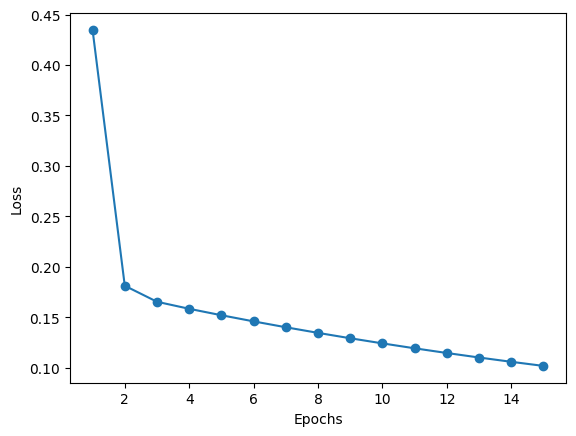

In [180]:
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')


To help the gradient descent converge quickly, **standardization** will be used - it shifts the mean of each feature so that it's centered at zero and each feature will have a standard deviation of 1.
$$ x_j'=\frac{x_j-\mu_j}{\alpha_j} $$

The reason why standardization works well with gradient descent is that when the features are on different scales, a learning rate that works well on updating one weight could be too large or small for other weights.

**Note**: before standardization if learning rate is too high, the global minimum will be overshoot

In [181]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


In [182]:
random_state = 1
alpha = 0.5
epochs = 20

In [183]:
w = np.random.RandomState(random_state).normal(loc=0, scale=0.01, size=X.shape[1])
b = np.float64(0)
losses = []

for _ in range(epochs):
    z = np.dot(X_std, w) + b
    w += alpha * 2.0 * np.dot((y - z), X_std) / X_std.shape[0]
    b += alpha * 2.0 * np.sum(y - z) / X_std.shape[0]
    loss = np.sum((y - z) ** 2) / X_std.shape[0]
    losses.append(loss)

Text(0, 0.5, 'Loss of standardized data')

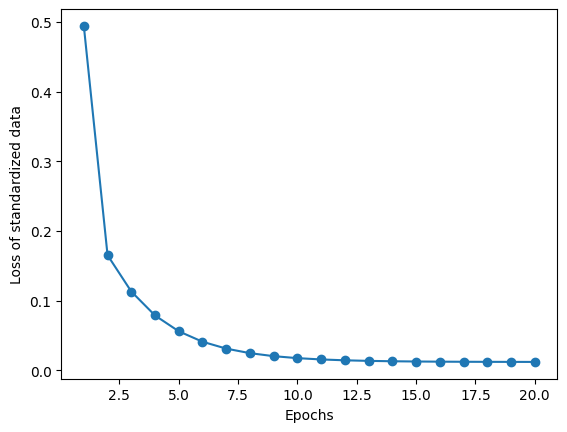

In [184]:
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss of standardized data')

- **Full batch gradient descent**: the loss gradient is calculated from the whole training set. When the dataset is large, it's not efficient anymore
- **Stochastic gradient descent (SGD)**: an alternative - weights will be updated for each training example instead the whole training set (need to shuffle the traning set for every epochs to obtain the good results). It's used for online learning
- **Mini-batch gradient descent**: using a smaller subsets of the training set to calculate gradient and update weights, it's more computional efficiency than SGD because of vectorization instead of using for loop.


In [188]:
random_state = 1
alpha = 0.01
epochs = 15

w = np.random.RandomState(random_state).normal(loc=0, scale=0.01, size=X.shape[1])
b = np.float64(0.)
avg_losses = []

# Apply the stochastic gradient descent
for _ in range(epochs):
    r = np.random.permutation(X_std.shape[0])
    random_X, random_y = X_std[r], y[r]
    losses = []
    for xi, yi in zip(random_X, random_y):
        z = np.dot(xi, w) + b
        w += alpha * 2.0 * (yi - z) * xi
        b += alpha * 2.0 * (yi - z)
        losses.append((yi - z) ** 2)
    avg_losses.append(np.mean(losses))

Text(0, 0.5, 'Average loss of stochastic gradient descent')

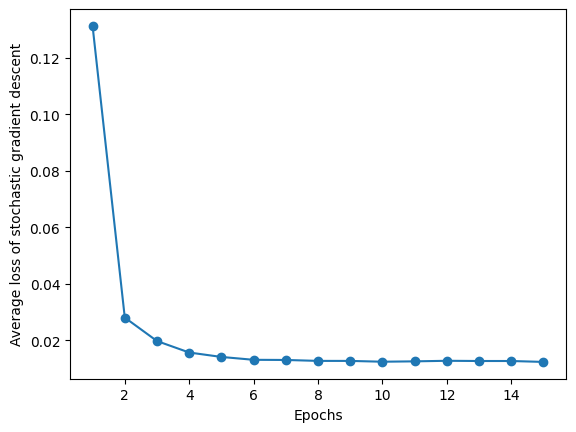

In [189]:
plt.plot(range(1, epochs + 1), avg_losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss of stochastic gradient descent')

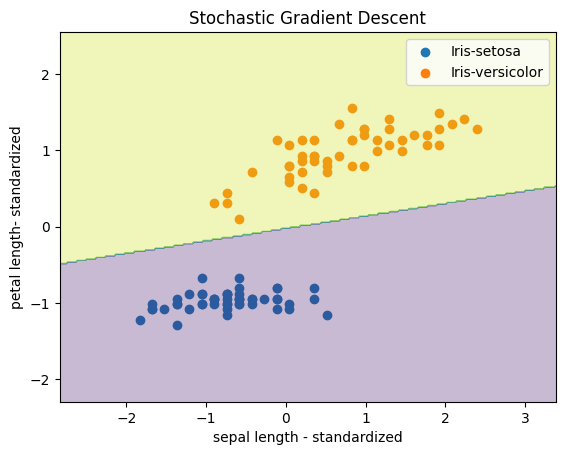

In [191]:
plt.scatter(X_std[:50, 0], X_std[:50, 1], label='Iris-setosa')
plt.scatter(X_std[50:, 0], X_std[50:, 1], label='Iris-versicolor')
# find the minimun and maximum values of the features, subtracting or adding 1 to create a little border
x1_min, x1_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
x2_min, x2_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
# create a grid of points between min and max values with step size of 0.02
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
# apply the model to every point on the grid
Z = np.dot(np.c_[xx1.ravel(), xx2.ravel()], w) + b
# apply the step function to the result
Z = np.where(Z >= 0.5, 1, 0)
# reshape the result to the grid shape
Z = Z.reshape(xx1.shape)
# plot the contour of the decision boundary
plt.contourf(xx1, xx2, Z, alpha=0.3)

plt.xlabel('sepal length - standardized')
plt.ylabel('petal length- standardized')
plt.title('Stochastic Gradient Descent')
plt.legend()
